# Import Library & Data

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import warnings
warnings.simplefilter(action='ignore')

In [107]:
raw_data = pd.read_csv('DataFolder/trainset.csv')
raw_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


# Data Cleaning Process

#### Data Exploration


In [108]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29271 non-null  object 
 2   marital      29271 non-null  object 
 3   education    29271 non-null  object 
 4   housing      29271 non-null  object 
 5   loan         29271 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [109]:
# covert unknown Data to np.Nan
raw_data = raw_data.replace('unknown',np.nan)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29011 non-null  object 
 2   marital      29220 non-null  object 
 3   education    28044 non-null  object 
 4   housing      28558 non-null  object 
 5   loan         28558 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [110]:
# Check Empty Data
raw_data["job"].unique()
raw_data.isna().sum()

age               0
job             260
marital          51
education      1227
housing         713
loan            713
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
nr.employed       0
Subscribed        0
dtype: int64

In [111]:
#Check no of unknown
raw_data = raw_data.dropna(subset=["job","marital","education","housing","loan"])
raw_data.isna().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64

In [112]:
#Data drop is around 7%. The remaining dataset is as follow
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27178 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          27178 non-null  int64  
 1   job          27178 non-null  object 
 2   marital      27178 non-null  object 
 3   education    27178 non-null  object 
 4   housing      27178 non-null  object 
 5   loan         27178 non-null  object 
 6   contact      27178 non-null  object 
 7   month        27178 non-null  object 
 8   day_of_week  27178 non-null  object 
 9   duration     27178 non-null  int64  
 10  campaign     27178 non-null  int64  
 11  pdays        27178 non-null  int64  
 12  poutcome     27178 non-null  object 
 13  nr.employed  27178 non-null  float64
 14  Subscribed   27178 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [113]:
#Ratio on Subscribed
ratio =  (raw_data['Subscribed'].value_counts()['no']/raw_data['Subscribed'].value_counts().sum())*100
ratio

89.07204356464787

In [114]:
#CheckPoint
check_point = raw_data.copy()

#### Data Spiting

In [115]:
#copy from check point
x = check_point.iloc[:,:-1]
y = check_point.iloc[:,-1]

In [116]:
#Regrouping all data to int data,nominal data, ordinary
x = x.loc[:,["age","duration","campaign","nr.employed","pdays",'education','month','day_of_week','job','marital','housing','loan','contact','poutcome']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27178 entries, 0 to 29270
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          27178 non-null  int64  
 1   duration     27178 non-null  int64  
 2   campaign     27178 non-null  int64  
 3   nr.employed  27178 non-null  float64
 4   pdays        27178 non-null  int64  
 5   education    27178 non-null  object 
 6   month        27178 non-null  object 
 7   day_of_week  27178 non-null  object 
 8   job          27178 non-null  object 
 9   marital      27178 non-null  object 
 10  housing      27178 non-null  object 
 11  loan         27178 non-null  object 
 12  contact      27178 non-null  object 
 13  poutcome     27178 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 3.1+ MB


In [117]:
#Data Splitting in a test size of 30 % and train size 70%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size= 0.4,random_state=45)

#### Data Handling


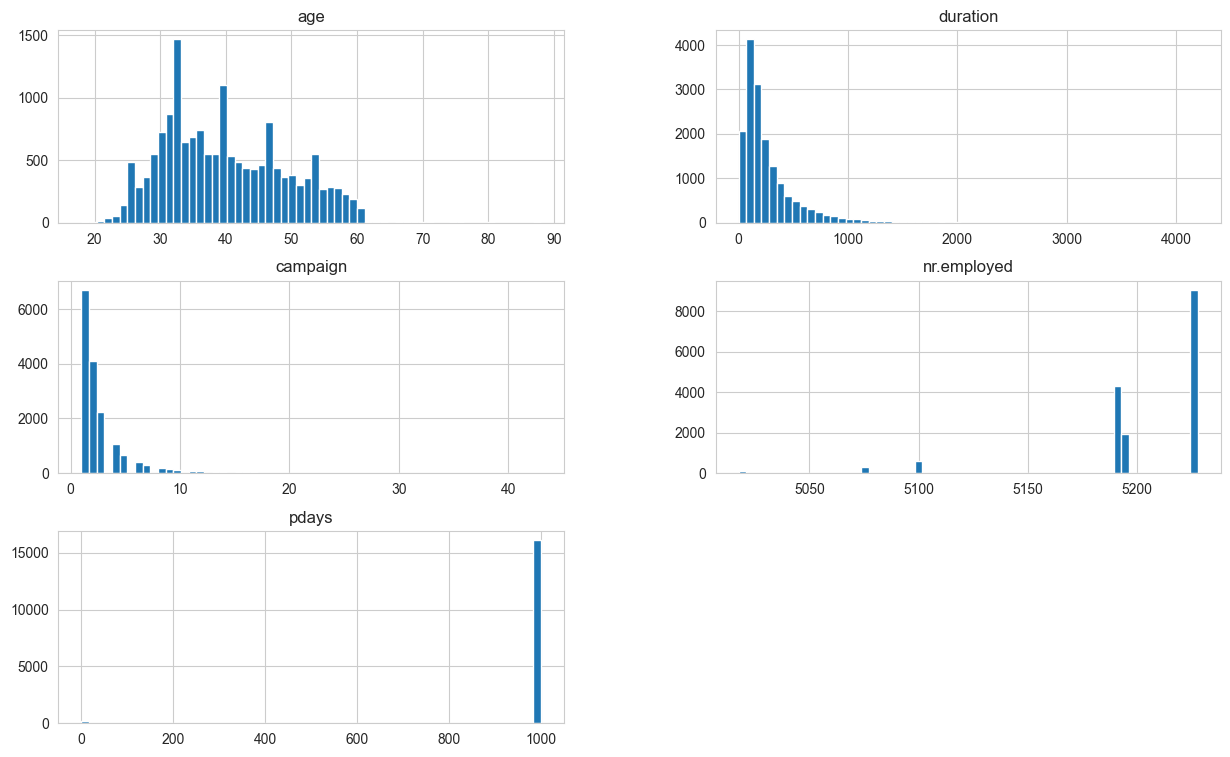

In [118]:
#Check Skew
x_train.hist(bins=60,figsize=(15,9))
plt.show()

In [119]:
#Check Skewness of the age
from scipy.stats import skew 
skew(x_train['age'],axis=0, bias=True)

0.4743217209673131

In [120]:
# age, duration, campaign, nr.employed need to handle outliers 
int_column =["age","duration","campaign","nr.employed","pdays"]
int_data = x_train[int_column]
int_data

,age,duration,campaign,nr.employed,pdays
1593,32,583,1,5099.1,5
16220,36,158,1,5228.1,999
20389,30,254,21,5228.1,999
12969,40,134,1,5228.1,999
1155,41,234,1,5195.8,999
...,...,...,...,...,...
17737,27,747,1,5228.1,999
14064,36,207,1,5228.1,999
6568,46,430,2,5191.0,999
7160,40,183,7,5191.0,999


In [121]:
#Capping outliner using IQR method
def iqr_capping(column_name):
    int_data[column_name] = int_data[column_name].astype(float)
    Q1 = int_data[column_name].quantile(0.25)
    Q3 = int_data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values outside the lower and upper bounds
    int_data.loc[:,column_name] = int_data[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    
    return int_data

In [122]:
for column in int_data.columns:
    iqr_capping(column)

In [123]:
#Standarization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(int_data)
int_data_scaled = std_scaler.transform(int_data)
df_int_std = pd.DataFrame(int_data_scaled, columns= int_data.columns)
df_int_std.head()

,age,duration,campaign,nr.employed,pdays
0,-0.836502,1.776431,-0.846475,-2.881411,0.0
1,-0.410540,-0.456802,-0.846475,0.762704,0.0
2,-1.049483,0.047646,2.290485,0.762704,0.0
3,0.015422,-0.582914,-0.846475,0.762704,0.0
4,0.121913,-0.057448,-0.846475,-0.506352,0.0


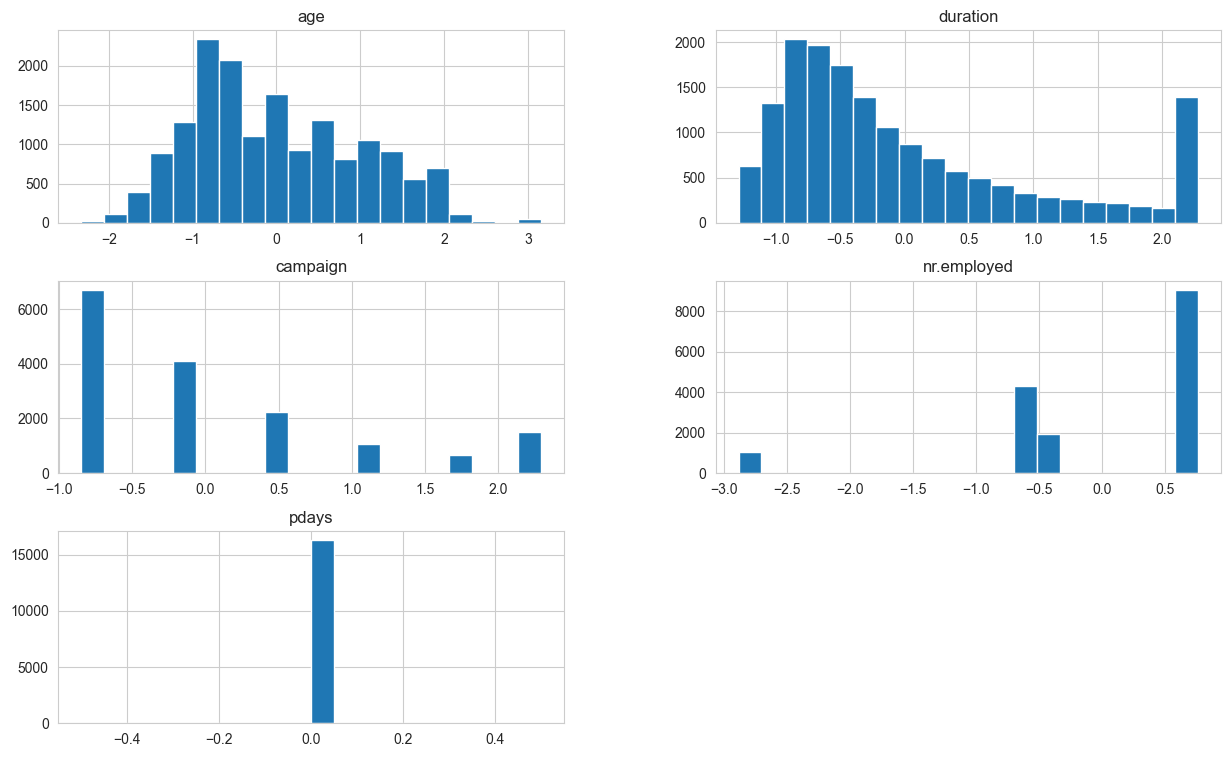

In [124]:
df_int_std.hist(bins=20,figsize=(15,9))
plt.show()

##### Converting Category index to int. Select Columns which need to encode, select columns with object data type

In [125]:
#
pd.Series({c: x_test[c].unique() for c in x_test.select_dtypes(include='object').columns})

education      [basic.9y, high.school, university.degree, bas...
month              [jul, apr, jun, may, aug, nov, mar, sep, oct]
day_of_week                            [mon, thu, wed, tue, fri]
job            [blue-collar, admin., housemaid, technician, r...
marital                              [divorced, single, married]
housing                                                [no, yes]
loan                                                   [no, yes]
contact                                    [cellular, telephone]
poutcome                         [nonexistent, failure, success]
dtype: object

In [126]:
#Group with Ordinal and Nominal Data 
ordinal_column = ['education']
nominal_column = ['month','day_of_week','job','marital','housing','loan','contact','poutcome']
cat_ordinal = x_train[ordinal_column]
cat_nominal = x_train[nominal_column]
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16306 entries, 1593 to 25413
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          16306 non-null  int64  
 1   duration     16306 non-null  int64  
 2   campaign     16306 non-null  int64  
 3   nr.employed  16306 non-null  float64
 4   pdays        16306 non-null  int64  
 5   education    16306 non-null  object 
 6   month        16306 non-null  object 
 7   day_of_week  16306 non-null  object 
 8   job          16306 non-null  object 
 9   marital      16306 non-null  object 
 10  housing      16306 non-null  object 
 11  loan         16306 non-null  object 
 12  contact      16306 non-null  object 
 13  poutcome     16306 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.9+ MB


In [127]:
x_train.head()


,age,duration,campaign,nr.employed,pdays,education,month,day_of_week,job,marital,housing,loan,contact,poutcome
1593,32,583,1,5099.1,5,basic.9y,apr,thu,blue-collar,married,no,no,cellular,success
16220,36,158,1,5228.1,999,basic.9y,jul,thu,blue-collar,married,no,yes,cellular,nonexistent
20389,30,254,21,5228.1,999,university.degree,jul,tue,entrepreneur,single,no,no,telephone,nonexistent
12969,40,134,1,5228.1,999,basic.4y,jun,thu,blue-collar,married,yes,no,telephone,nonexistent
1155,41,234,1,5195.8,999,high.school,nov,thu,admin.,single,yes,no,telephone,nonexistent


In [128]:
x_train["education"].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'basic.6y', 'professional.course', 'illiterate'], dtype=object)

In [129]:
#Converting Ordinary data to array index using OrdinaryEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_Encoder = OrdinalEncoder(categories=[['illiterate', 'basic.4y','basic.6y', 'basic.9y','high.school', 'university.degree',
       'professional.course']])
cat_ordinal_endcoded = ordinal_Encoder.fit_transform(cat_ordinal)
df_ordinal_endcoded = pd.DataFrame(cat_ordinal_endcoded,columns= cat_ordinal.columns)
df_ordinal_endcoded.astype(float)
df_ordinal_endcoded.head()

,education
0,3.0
1,3.0
2,5.0
3,1.0
4,4.0


In [130]:
#Converting Nominal data to array index using one hot encoder
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()
oneHotEncoder.fit(cat_nominal)
cat_nominal_1hot = oneHotEncoder.transform(cat_nominal)

df_nominal_1hot = pd.DataFrame(cat_nominal_1hot.toarray(), columns=oneHotEncoder.get_feature_names_out())
df_nominal_1hot

,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,...,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16301,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
16302,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16303,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
16304,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [131]:
#Converting Nominal data to array index using one hot encoder
YoneHotEncoder = OneHotEncoder()
cat_nominal_before_encode = pd.DataFrame(y_train)
cat_nominal_1hot = YoneHotEncoder.fit_transform(cat_nominal_before_encode)
df_y_train_result = pd.DataFrame(cat_nominal_1hot.toarray(),columns=YoneHotEncoder.categories_)
df_y_train_result.astype(float)

,no,yes
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
16301,1.0,0.0
16302,1.0,0.0
16303,1.0,0.0
16304,1.0,0.0


In [132]:
# Concat all the standardize data and encoded data
x_train = pd.concat([df_int_std,df_ordinal_endcoded,df_nominal_1hot],axis = 1)

In [133]:
x_train.head()

,age,duration,campaign,nr.employed,pdays,education,month_apr,month_aug,month_dec,month_jul,...,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.836502,1.776431,-0.846475,-2.881411,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.410540,-0.456802,-0.846475,0.762704,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,-1.049483,0.047646,2.290485,0.762704,0.0,5.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.015422,-0.582914,-0.846475,0.762704,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.121913,-0.057448,-0.846475,-0.506352,0.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Model Selection

In [134]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [135]:
from sklearn import ensemble
DecidtionTree_model = ensemble.RandomForestClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression

In [136]:
test_data_ordinal = ordinal_Encoder.transform(x_test[ordinal_column])
test_data_nominal = oneHotEncoder.transform(x_test[nominal_column])
test_data_int = std_scaler.transform(x_test[int_column])
test_data_result = YoneHotEncoder.transform(pd.DataFrame(y_test))

In [137]:
df_test_nominal_1hot = pd.DataFrame(test_data_nominal.toarray(), columns=oneHotEncoder.get_feature_names_out())
df_test_ordinal_endcoded = pd.DataFrame(test_data_ordinal,columns= cat_ordinal.columns)
df_test_data_int = pd.DataFrame(test_data_int, columns= std_scaler.get_feature_names_out())

In [138]:
#Concat all Transformed Data
x_test  = pd.concat([df_test_data_int,df_test_ordinal_endcoded,df_test_nominal_1hot],axis = 1)
x_test.head()

,age,duration,campaign,nr.employed,pdays,education,month_apr,month_aug,month_dec,month_jul,...,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.186818,0.252577,2.917876,0.762704,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.410540,0.226304,-0.846475,0.762704,0.0,4.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.410540,3.809986,-0.846475,-4.305660,0.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.197559,-0.971760,2.290485,0.762704,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.760856,-0.761573,-0.846475,-4.305660,0.0,6.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [139]:
#Compare to train Data
x_train.head()

,age,duration,campaign,nr.employed,pdays,education,month_apr,month_aug,month_dec,month_jul,...,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.836502,1.776431,-0.846475,-2.881411,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.410540,-0.456802,-0.846475,0.762704,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,-1.049483,0.047646,2.290485,0.762704,0.0,5.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.015422,-0.582914,-0.846475,0.762704,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.121913,-0.057448,-0.846475,-0.506352,0.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [140]:
DecidtionTree_model.fit(x_train,y_train)
DecidtionTree_model.score(x_train,y_train)
prediction_tree = DecidtionTree_model.predict(x_test)
prediction_tree

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [141]:
prediction_log = log_reg.predict(x_test)
prediction_log

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

# Model Evaluation

### Logistic Regression 

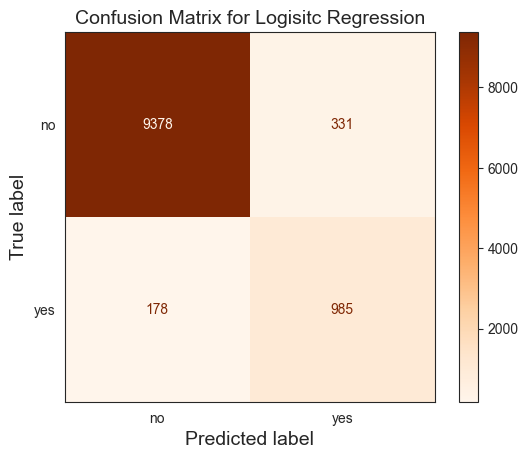

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_style('white')
ConfusionMatrixDisplay.from_estimator(log_reg,x_test,y_test,cmap='Oranges')
plt.title('Confusion Matrix for Logisitc Regression',fontsize=14)
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('True label',fontsize=14)
plt.show()

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_log))

              precision    recall  f1-score   support

          no       0.98      0.97      0.97      9709
         yes       0.75      0.85      0.79      1163

    accuracy                           0.95     10872
   macro avg       0.86      0.91      0.88     10872
weighted avg       0.96      0.95      0.95     10872



In [144]:
#Accuracy score of the  Train Model
accuracy = log_reg.score(x_train, y_train)
print(f"The accuracy Score is {accuracy}")

The accuracy Score is 0.9559058015454434


In [145]:
#Accuracy score of the Model
accuracy = log_reg.score(x_test, y_test)
print(f"The accuracy Score is {accuracy}")

The accuracy Score is 0.9531824871228844


In [146]:
#Calculate the Precision Score
from sklearn.metrics import precision_score
precision = precision_score(y_test, prediction_log,pos_label='yes')
print(f"The Precision Score is {precision}")


The Precision Score is 0.7484802431610942


In [147]:
#Calculate the Recall Score
from sklearn.metrics import recall_score
recall = recall_score(y_test, prediction_log,pos_label='yes')
print(f"The Recall Score is {recall}")


The Recall Score is 0.8469475494411006


In [148]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, prediction_log, pos_label='yes')
print("F1 score:", f1)

F1 score: 0.7946752722872126


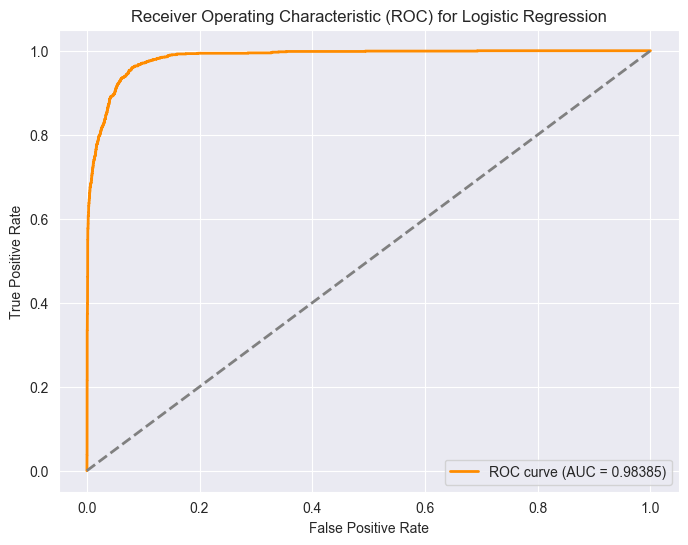

In [149]:
from sklearn import metrics
y_pred_proba = log_reg.predict_proba(x_test)[:,1]
fpr_log, tpr_log,_= metrics.roc_curve(y_test,  y_pred_proba,pos_label='yes')
roc_auc = metrics.auc(fpr_log, tpr_log)

#create ROC curve
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

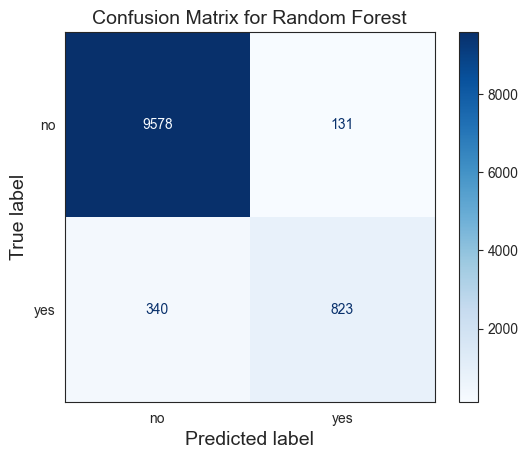

In [150]:
# Create Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_style('white')
ConfusionMatrixDisplay.from_estimator(DecidtionTree_model,x_test,y_test,cmap='Blues')
plt.title('Confusion Matrix for Random Forest',fontsize=14)
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('True label',fontsize=14)
plt.show()

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_tree))

              precision    recall  f1-score   support

          no       0.97      0.99      0.98      9709
         yes       0.86      0.71      0.78      1163

    accuracy                           0.96     10872
   macro avg       0.91      0.85      0.88     10872
weighted avg       0.95      0.96      0.95     10872



In [152]:
#Accuracy score of the Model
accuracy = DecidtionTree_model.score(x_train, y_train)
print(f"The accuracy Score is {accuracy}")

The accuracy Score is 0.999938672881148


In [153]:
#Accuracy score of the Model
accuracy = DecidtionTree_model.score(x_test, y_test)
print(f"The accuracy Score is {accuracy}")

The accuracy Score is 0.9566777041942605


In [154]:
#Calculate the Precision Score
from sklearn.metrics import precision_score
precision = precision_score(y_test, prediction_tree,pos_label='yes')
print(f"The Precision Score is {precision}")


The Precision Score is 0.8626834381551363


In [155]:
#Calculate the Recall Score
from sklearn.metrics import recall_score
recall = recall_score(y_test, prediction_tree,pos_label='yes')
print(f"The Recall Score is {recall}")


The Recall Score is 0.7076526225279449


In [156]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, prediction_tree, pos_label='yes')
print("F1 score:", f1)

F1 score: 0.7775153519130846


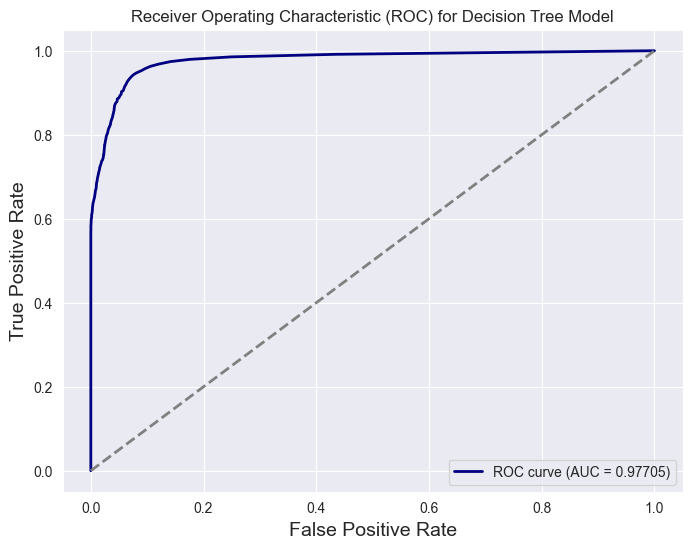

In [157]:
y_pred_proba_tree = DecidtionTree_model.predict_proba(x_test)[:,1]
fpr_tree, tpr_tree,_= metrics.roc_curve(y_test,  y_pred_proba_tree,pos_label='yes')
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)

#create ROC curve
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='navy', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',fontsize = 14 )
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic (ROC) for Decision Tree Model')
plt.legend(loc="lower right")
plt.show()

Base on the comparison, the Logistic model has a bigger Area under the curve which conclude that Logistic and perform a more accurate result